<a href="https://colab.research.google.com/github/YasamanAhmd/DataVisualization/blob/main/26_Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
df = pd.read_csv('/content/sample_data/temporal.csv')
df.head(10) #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [46]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
!pip install pandas-profiling==2.7.1 

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

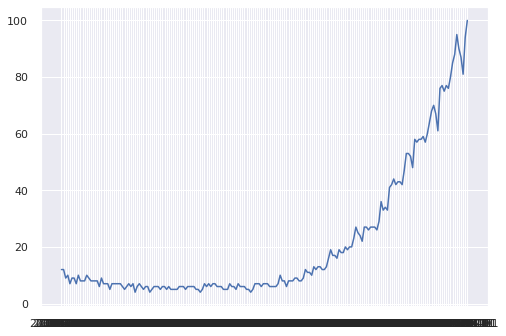

In [50]:
import matplotlib.pyplot as plt
plt.plot(df['Mes'], df['data science']) 

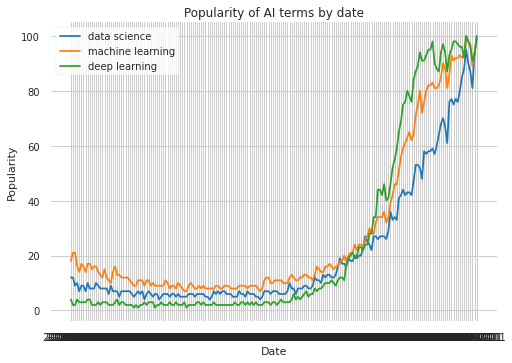

In [10]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

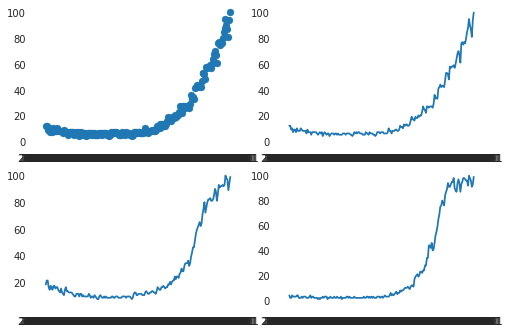

In [20]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(df['Mes'], df['data science'])
axes[0, 1].plot(df['Mes'], df['data science'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])

<BarContainer object of 194 artists>

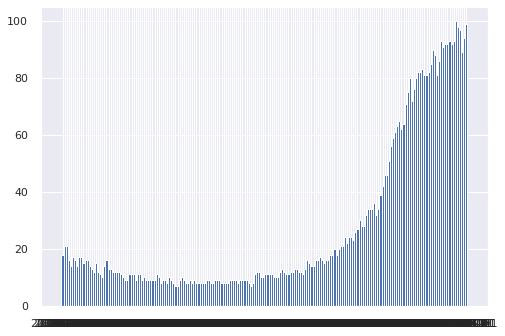

In [49]:
plt.bar(df['Mes'], df['machine learning'], width=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


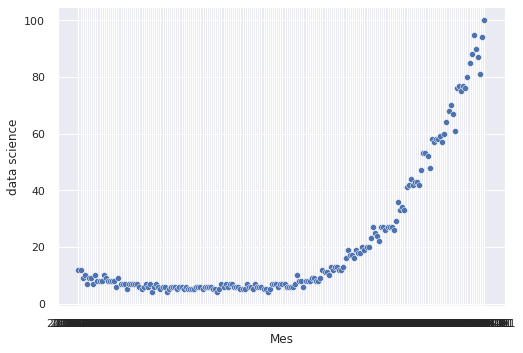

In [21]:
import seaborn as sns
sns.set()
sns.scatterplot(df['Mes'], df['data science'])

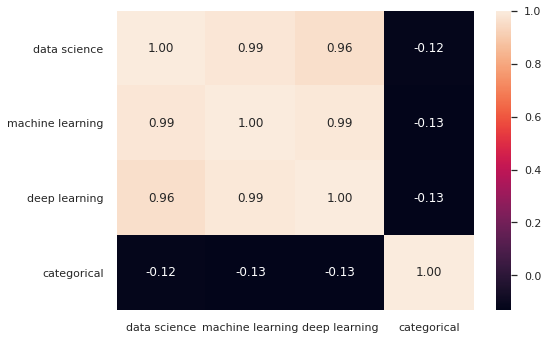

In [22]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [27]:
from bokeh.plotting import figure, output_file, save
output_file('data_science_popularity.html')

In [30]:
p = figure(title='data science', x_axis_label='Mes', y_axis_label='data science')
p.line(df['Mes'], df['data science'], legend_label='popularity', line_width=2)
save(p)

'/content/multiple_graphs.html'

In [32]:
#Folium is a library that allows us to draw maps, markers and we can also draw our data on them. 
#Folium lets us choose the map supplier, this determines the style and quality of the map. 
#In this article, for simplicity, we’re only going to look at OpenStreetMap as a map provider.
import folium
m1 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=18)
m1.save('map1.html')

In [35]:
m2 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=16)
folium.Marker([41.38, 2.176], popup='<i>Hello this is Yasaman in Deliware workshop hehe</i>', tooltip='click me').add_to(m2)
folium.Marker([41.38, 2.174], popup='<b>Hello this is Yasaman in Deliware workshop hehe</b>', tooltip='or click me').add_to(m2)
m2.save('map2.html')

In [ ]:
!pip install geopandas

In [38]:
from geopandas.tools import geocode
df2 = pd.read_csv('/content/sample_data/mapa.csv')
df2.dropna(axis=0, inplace=True)
df2['geometry'] = geocode(df2['País'], provider='nominatim')['geometry'] #It may take a while because it downloads a lot of data.
df2['Latitude'] = df2['geometry'].apply(lambda l: l.y)
df2['Longitude'] = df2['geometry'].apply(lambda l: l.x)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [44]:
m3 = folium.Map(location=[39.326234,-4.838065], tiles='openstreetmap', zoom_start=3)
def color_producer(val):
  if val <= 50:
    return 'red'
  else:
    return 'green'
for i in range(0,len(df2)):
  folium.Circle(location=[df2.iloc[i]['Latitude'], df2.iloc[i]['Longitude']], radius=5000*df2.iloc[i]['data science'], color=color_producer(df2.iloc[i]['data science'])).add_to(m3)
m3.save('map3.html')